In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [32]:
train_df = pd.read_csv("train.csv", encoding='latin-1')
test_df = pd.read_csv("test.csv", encoding='latin-1')

In [33]:
train_df = train_df[['text', 'sentiment']].dropna()
test_df = test_df[['text', 'sentiment']].dropna()

In [34]:
train_df['text'] = train_df['text'].astype(str).str.lower()
test_df['text'] = test_df['text'].astype(str).str.lower()

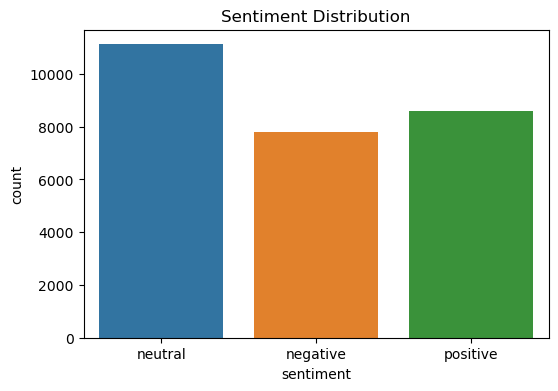

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()

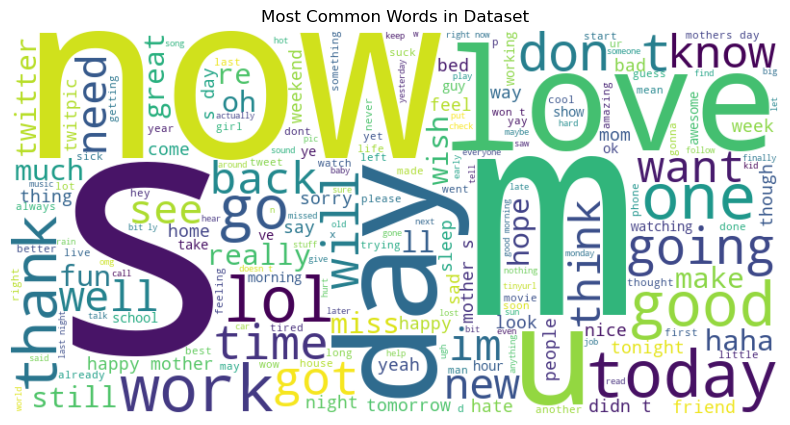

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Dataset")
plt.show()

In [37]:
label_encoder = LabelEncoder()
train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
test_df['sentiment'] = label_encoder.transform(test_df['sentiment'])

In [38]:
vocab_size = 10000
max_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

In [39]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=max_length, padding='post')

In [40]:
y_train = train_df['sentiment']
y_test = test_df['sentiment']

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [42]:
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.4),
    Dense(3, activation='softmax')
])
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


c:\Users\Joel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3921 - loss: 1.0954 - val_accuracy: 0.5098 - val_loss: 0.9868 - learning_rate: 0.0010
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4823 - loss: 1.0068 - val_accuracy: 0.5200 - val_loss: 0.9673 - learning_rate: 0.0010
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5424 - loss: 0.9252 - val_accuracy: 0.4720 - val_loss: 1.0096 - learning_rate: 0.0010
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5898 - loss: 0.8655 - val_accuracy: 0.5735 - val_loss: 0.9282 - learning_rate: 0.0010
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6716 - loss: 0.7628 - val_accuracy: 0.5935 - val_loss: 0.9081 - learning_rate: 0.0010
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6917 - loss: 0.7332 - val_accuracy: 0.4112 - val_loss: 1.0816 - learning_rate: 0.0010
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6793 - loss: 0.

In [44]:
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(3, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [45]:
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.5304 - loss: 0.9447 - val_accuracy: 0.7078 - val_loss: 0.6950 - learning_rate: 0.0010
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7652 - loss: 0.5882 - val_accuracy: 0.7180 - val_loss: 0.6670 - learning_rate: 0.0010
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8209 - loss: 0.4716 - val_accuracy: 0.7209 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8557 - loss: 0.3910 - val_accuracy: 0.7253 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8827 - loss: 0.3276 - val_accuracy: 0.7118 - val_loss: 0.8545 - learning_rate: 0.0010
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9039 - loss: 0.2711 - val_accuracy: 0.6987 - val_loss: 0.9211 - learning_rate: 0.0010
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9228 - l

In [46]:
y_pred_rnn = np.argmax(rnn_model.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [47]:
print("RNN Model Performance:")
print(classification_report(y_test, y_pred_rnn, target_names=label_encoder.classes_))
print("LSTM Model Performance:")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

RNN Model Performance:
              precision    recall  f1-score   support

    negative       0.59      0.56      0.57      1001
     neutral       0.55      0.61      0.58      1430
    positive       0.70      0.62      0.66      1103

    accuracy                           0.60      3534
   macro avg       0.61      0.60      0.60      3534
weighted avg       0.61      0.60      0.60      3534

LSTM Model Performance:
              precision    recall  f1-score   support

    negative       0.67      0.72      0.70      1001
     neutral       0.67      0.66      0.67      1430
    positive       0.76      0.73      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.70      0.70      0.70      3534
weighted avg       0.70      0.70      0.70      3534



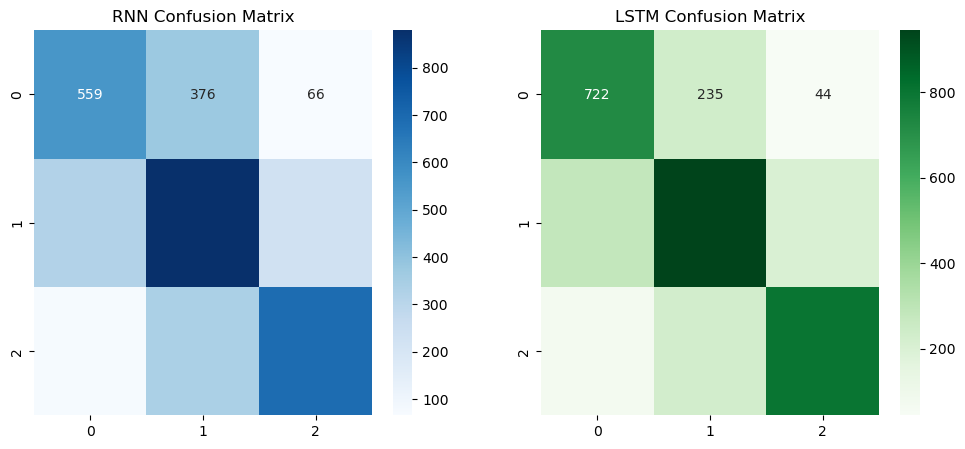

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("RNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("LSTM Confusion Matrix")
plt.show()

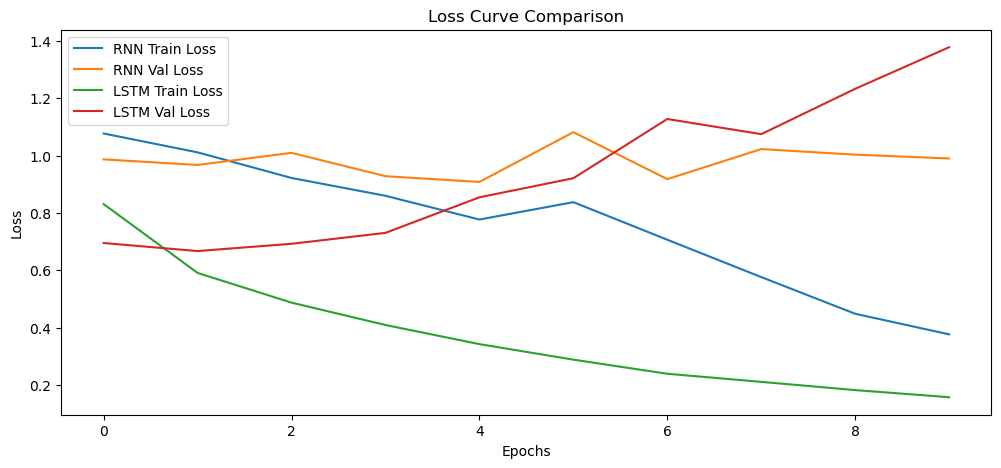

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.show()

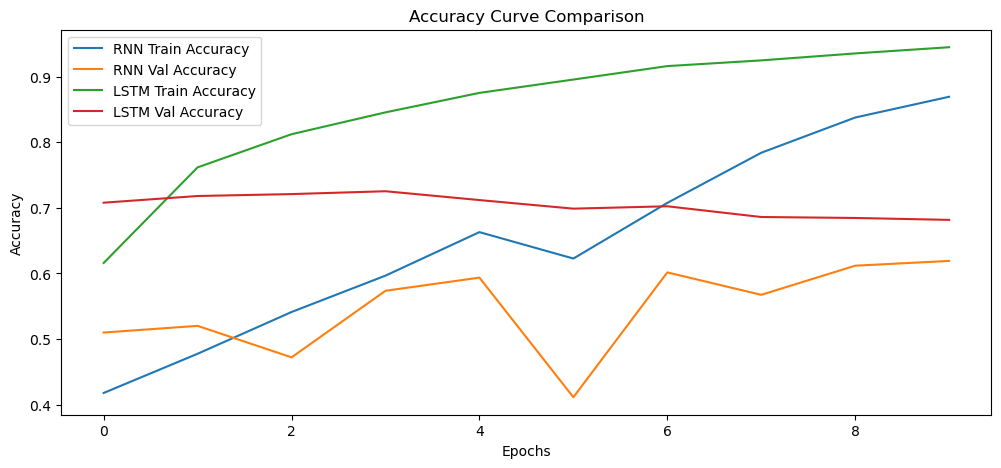

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['accuracy'], label='RNN Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve Comparison')
plt.show()

In [51]:
def predict_sentiment(model, text):
    seq = tokenizer.texts_to_sequences([text.lower()])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded)
    sentiment = label_encoder.inverse_transform([np.argmax(pred)])
    return sentiment[0]

In [52]:
# Map numeric labels back to sentiment
def predict_sentiment(model, text):
    seq = tokenizer.texts_to_sequences([text.lower()])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded)
    sentiment = label_encoder.inverse_transform([np.argmax(pred)])
    return sentiment[0]  # Return label instead of a number

# Test Predictions
sample_texts = ["I love this!", "This is terrible.", "I am feeling neutral about this."]
for text in sample_texts:
    print(f"Text: {text} -> Predicted Sentiment (RNN): {predict_sentiment(rnn_model, text)}")
    print(f"Text: {text} -> Predicted Sentiment (LSTM): {predict_sentiment(lstm_model, text)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: I love this! -> Predicted Sentiment (RNN): positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: I love this! -> Predicted Sentiment (LSTM): positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Text: This is terrible. -> Predicted Sentiment (RNN): negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: This is terrible. -> Predicted Sentiment (LSTM): negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Text: I am feeling neutral about this. -> Predicted Sentiment (RNN): neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Text: I am feeling neutral about this. -> Predicted Sentiment (LSTM): negative
